In [2]:
############# WELCOME TO DIFFERENTIAL EQUATIONS! ###############

import math                                     # 파이썬의 기본 수학 연산 패키지
import numpy as np                              # 벡터 및 행렬 연산을 위한 패키지
from matplotlib import pyplot as plt            # 그래프 및 시각화를 위한 패키지
from celluloid import Camera                    # gif 애니메이션 생성을 위한 패키지

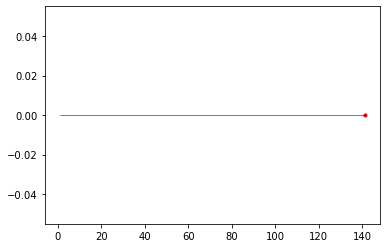

In [21]:
############# 간단한 1차원 미분방정식을 풀어봅시다! ###############

def solver(f,x0,t,r):             # 미분방정식을 푸는 수치계산법을 시행하는 함수 (보통 solver(해결사?) 라고 합니다)
  n = np.size(x0); T = np.size(t)
  dt = t[1]-t[0]
  x = np.zeros((n,T))
  x[:,0] = x0
  for i in range (T-1):
    k1 = dt * f(x[:,i],r)
    k2 = dt * f(x[:,i]+k1/2,r)
    k3 = dt * f(x[:,i]+k2/2,r)
    k4 = dt * f(x[:,i]+k3,r)
    x[:,i+1] = x[:,i] + (k1+2*k2+2*k3+k4)/6.0
  return x

def f(x,r):                   # 우리가 해를 구할 방정식 ( Ex) x_prime = x 는 x'(t) = x(t) 라는 미분방정식을 푸는 것입니다)
  x_prime = x
  return x_prime


############################################

x0 = 1                                      # 방정식을 풀 초깃값
t_fin = 5                                   # 방정식의 해를 구할 마지막 시간

############################################


# 방정식의 해를 구하고 애니메이션으로 만들기!
 
t = np.arange(0,t_fin+0.001,0.05)
x = solver(f,x0,t,0)

fig, axis = plt.subplots()
camera = Camera(fig)
for i in range (1,len(t)):
  axis.plot(x[0][0:i],np.zeros(i),c='k',lw=0.5)
  axis.scatter(x[0][i-1],0,c='r',s=10)
  camera.snap()
animation = camera.animate(interval=50, blit=True)
animation.save('1d.mp4',dpi=100,savefig_kwargs={'pad_inches': 'tight'})

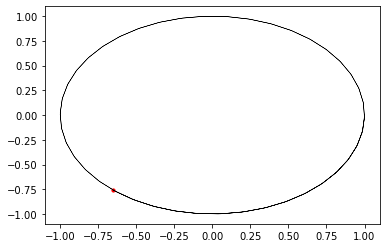

In [38]:
############# 간단한 2차원 (연립)미분방정식을 풀어봅시다! ###############

def f(x,r):
  x_prime = np.zeros(2)
  x_prime[0] = 3*x[1]
  x_prime[1] = -3*x[0]
  return x_prime


############################################

x0 = 1; y0 = 0                              # 방정식을 풀 초깃값
t_fin = 5                                   # 방정식의 해를 구할 마지막 시간

############################################


# 방정식의 해를 구하고 애니메이션으로 만들기!

t = np.arange(0,t_fin+0.001,0.05)
x = solver(f,np.array([x0,y0]),t,0)
            
fig, axis = plt.subplots()
camera = Camera(fig)
for i in range (1,len(t)):
  axis.plot(x[0][0:i],x[1][0:i],c='k',lw=0.5)
  axis.scatter(x[0][i-1],x[1][i-1],c='r',s=10)
  camera.snap()
animation = camera.animate(interval=50, blit=True)
animation.save('2d.mp4',dpi=100,savefig_kwargs={'pad_inches': 'tight'})

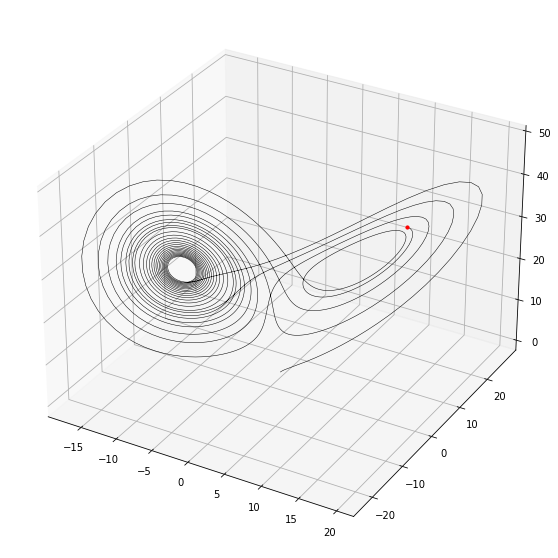

In [53]:
############# 로렌츠 방정식을 풀어봅시다! ###############

def lorenz(x,r):                             # 로렌츠 방정식
  x_prime = np.zeros(np.size(x))
  x_prime[0] = 10*(x[1]-x[0])
  x_prime[1] = x[0]*(r-x[2])-x[1]
  x_prime[2] = x[0]*x[1] - (8/3)*x[2]
  return x_prime


############################################

ic = np.array([1,1,1])                      # 로렌츠 방정식을 풀 초깃값
t_fin = 20                                   # 로렌츠 방정식의 해를 구할 마지막 시간
r = 28                                      # 로렌츠 방정식의 파라미터 (r을 5 ~ 120정도까지 자유롭게 바꿔보세요)

############################################


# 로렌츠 방정식의 해를 구하고 그리기

t = np.arange(0,t_fin+0.001,0.01)
x = solver(lorenz,ic,t,r)

fig = plt.figure()
fig.set_size_inches(10,10)
axis = fig.add_subplot(projection='3d')
axis.plot(x[0][0:len(t)], x[1][0:len(t)], x[2][0:len(t)], c='k',lw=0.5)
axis.scatter(x[0][-1], x[1][-1], x[2][-1], c='r',s=10)
plt.show()

# t = np.arange(0,t_fin+0.001,0.05)
# x = solver(lorenz,ic,t,r)

# fig = plt.figure()
# axis = fig.add_subplot(projection='3d')
# camera = Camera(fig)
# for i in range (1,len(t)):
#   axis.plot(x[0][0:i], x[1][0:i], x[2][0:i], c='k',lw=0.5)
#   axis.scatter(x[0][i-1], x[1][i-1], x[2][i-1], c='r',s=10)
#   camera.snap()
  
# animation = camera.animate(interval=50, blit=True)
# animation.save('basic.mp4',dpi=100,savefig_kwargs={'pad_inches': 'tight'})